In [12]:
from bhmm.hidden.api import forward

In [73]:
from pyemma.msm import MaximumLikelihoodMSM, MaximumLikelihoodHMSM
from msmbuilder.cluster import NDGrid
from sklearn.pipeline import Pipeline
import pickle
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# traj_paths = glob('data/000.5pc/*.npy')
# X = [np.load(traj_path) for traj_path in traj_paths]

xmin, xmax = -1.2, 1.2
tau = 25
k_opt=6
m_opt = 200

data_pc = '001.9pc'

#                   ('cluster',NDGrid(min=xmin, max=xmax, n_bins_per_feature=200)),
#                   ('msm', MaximumLikelihoodMSM(lag=1, score_method='vamp1'))])


# pickle.dump(model, open('model_lag1.pickl', 'wb'))



In [74]:
X = [np.load(x) for x in glob('data/'+data_pc+'/*npy')]

In [83]:
m_opt = int(np.sqrt(len(X)*X[0].shape[0]))
cluster = NDGrid(min=xmin, max=xmax, n_bins_per_feature=m_opt)
dtrajs = cluster.fit_transform(X)

In [160]:
train = dtrajs[:50]
test = dtrajs[50:]

In [165]:
msminit = MaximumLikelihoodMSM(lag=25)
msminit.fit(train)

MaximumLikelihoodMSM(connectivity='largest', count_mode='sliding',
           dt_traj='1 step', lag=25, maxerr=1e-08, maxiter=1000000,
           reversible=True, score_k=10, score_method='VAMP2', sparse=False,
           statdist_constraint=None)

In [167]:
ttrain = msminit.dtrajs_active
ttest = []
for x in test:
    try:
        ttest.append(msminit._full2active[x])
    except:
        pass
print(len(ttest))

49


In [174]:
M = MaximumLikelihoodHMSM(lag=25, nstates=4, msm_init=msminit)
M.fit(train)
obs_prob = M.observation_probabilities
T = M.transition_matrix
pi = M.pi

In [177]:
loglik = 0
for obs in ttest:
    p_obs = obs_prob[:, obs].T
    loglik += forward(T, p_obs, pi)[0]
    
print(loglik)  

-348470.55853994156


In [15]:
# # def forward(A, pobs, pi, T=None, alpha_out=None):
# """Compute P( obs | A, B, pi ) and all forward coefficients.

# Parameters
# ----------
# A : ndarray((N,N), dtype = float)
#     transition matrix of the hidden states
# pobs : ndarray((T,N), dtype = float)
#     pobs[t,i] is the observation probability for observation at time t given hidden state i
# pi : ndarray((N), dtype = float)
#     initial distribution of hidden states
# T : int, optional, default = None
#     trajectory length. If not given, T = pobs.shape[0] will be used.
# alpha_out : ndarray((T,N), dtype = float), optional, default = None
#     containter for the alpha result variables. If None, a new container will be created.

# Returns
# -------
# logprob : float
#     The probability to observe the sequence `ob` with the model given
#     by `A`, `B` and `pi`.
# alpha : ndarray((T,N), dtype = float), optional, default = None
#     alpha[t,i] is the ith forward coefficient of time t. These can be
#     used in many different algorithms related to HMMs.

# """

In [204]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=20)

In [205]:
ks = np.arange(2,6)
k = 2
scores = np.zeros((ks.shape[0], cv.n_splits))
scores

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [206]:
for kdx, k in enumerate(ks):
    print(k)
    for idx, (train_idx, test_idx) in enumerate(cv.split(dtrajs)):
        train = [dtrajs[i] for i in train_idx]
        train = [dtrajs[i] for i in test_idx]
        print('\t', idx)
        # initialize MInit
        Minit = MaximumLikelihoodMSM(lag=25)
        Minit.fit(train)

        # Map new trajectories
        ttrain = Minit.dtrajs_active
        ttest = []
        for x in test:
            try:
                ttest.append(Minit._full2active[x])
            except:
                pass

        # Fit HMM
        M = MaximumLikelihoodHMSM(lag=25, nstates=k, msm_init=Minit)
        M.fit(train)
        obs_prob = M.observation_probabilities
        T = M.transition_matrix
        pi = M.pi

        # Get log likelihood 
        loglik = 0
        for obs in ttest:
            p_obs = obs_prob[:, obs].T
            loglik += forward(T, p_obs, pi)[0]

        scores[kdx][idx] = loglik
    
    
    

    


2
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
3
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
4
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
5
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19


In [207]:
scores_med = np.median(scores, axis=1)
scores_std = np.std(scores, axis=1)
data = {'k':ks, 'll_med':scores_med, 'll_err': scores_std}

In [208]:
import pandas as pd
df = pd.DataFrame(data)

(1, 6)

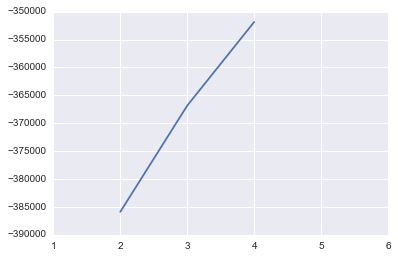

In [215]:
plt.errorbar(df['k'],df['ll_med'])
plt.xlim((1,6))
# plt.ylim

In [214]:
scores

array([[ -388141.04520672,  -385855.19477492,  -385923.12110862,
         -388205.78870628,  -387023.13722101,  -362656.70822057,
         -362965.66179208,  -387359.3303403 ,  -363043.73121826,
         -371341.03193405,  -387060.65385971, -6814387.01141145,
         -386530.63539616,  -362609.81352878,  -386984.96759922,
         -354817.59412266,  -378106.82081307,  -389345.63631973,
         -355057.17073293,  -361362.98264001],
       [ -357488.20507602,  -189054.61804623,  -345522.18925013,
         -298388.5744526 ,  -382841.42509664,  -338430.67742427,
         -366499.29036628,  -382343.87173055,  -322169.45697089,
         -303623.69030453,  -374514.71543644,  -381328.72351913,
         -373694.21128686,  -368884.89191661,  -347133.17931563,
         -369416.05671826,  -367188.89298249,  -375465.51662898,
         -371716.67538025,  -363585.53870668],
       [ -351674.50868746,  -356447.05437913,  -345405.38452926,
         -334682.46013492,  -333737.42102126,  -374987.925859